<a href="https://colab.research.google.com/github/monicafar147/classification-predict-streamlit-template/blob/Template/climate_change_monica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')

#text preprocessing
import re
import string
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import Word


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the data

In [0]:
train = pd.read_csv("https://raw.githubusercontent.com/monicafar147/classification-predict-streamlit-template/master/climate-change-belief-analysis/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/monicafar147/classification-predict-streamlit-template/master/climate-change-belief-analysis/test.csv")

In [3]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


# EDA

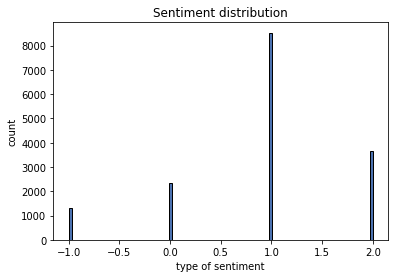

In [4]:
plt.hist(train['sentiment'], bins = 100, edgecolor = 'k')
plt.xlabel('type of sentiment')
plt.ylabel('count')
plt.title('Sentiment distribution')
plt.show()

Majority of the tweets in the training data were classified as type 1.

In [0]:
# explore the word count and tweet lengths
train['length'] = train['message'].astype(str).apply(len)
train['word_count'] = train['message'].apply(lambda x: len(str(x).split()))
test['length'] = test['message'].astype(str).apply(len)
test['word_count'] = test['message'].apply(lambda x: len(str(x).split()))

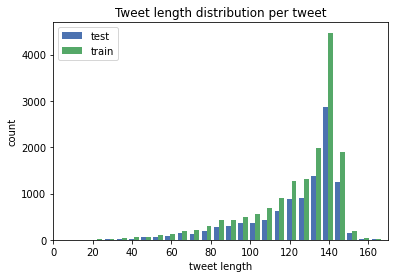

In [6]:
plt.hist([test['length'], train['length']], bins=100, label=['test', 'train'])
plt.title('Tweet length distribution per tweet')
plt.xlabel('tweet length')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xlim([0,170])
plt.show()


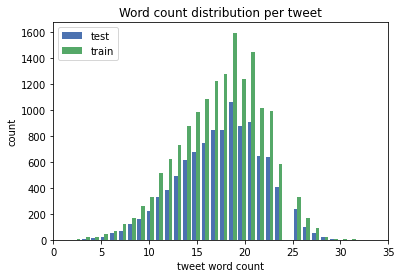

In [7]:
plt.hist([test['word_count'], train['word_count']], bins=100, label=['test', 'train'])
plt.title('Word count distribution per tweet')
plt.xlabel('tweet word count')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xlim([0,35])
plt.show()


# Data preprocessing

Combine the train and test data inorder to do preprocessing on both datasets.
This is essential to test the models being built.
This step will also be useful for implementing the API.

In [0]:
# removing Short Words
#data['tidy_tweet'] = data['tidy_tweet'].apply(lambda word: ' '.join([word for word in word.split() if len(word)>3]))

In [0]:
def _preprocess(data):
  df = data.copy()

  # apply lowercase to data
  data['message'] = data['message'].apply(lambda word: ''.join(word.lower()))

  # function to remove contraction
  def remove_contraction(row):
    fixed = [contractions.fix(word) for word in row.split()]
    return ' '.join(map(str,fixed))

  # replace contractions
  df['message'] = np.vectorize(remove_contraction)(df['message'])

  # function to remove patterns
  def remove_pattern(text,pattern,replacement=''):
    remove_this = re.findall(pattern, text)
    for item in remove_this:
      text = re.sub(item, replacement, text)
    return text

  # remove hashtags
  df['message'] = np.vectorize(remove_pattern)(df['message'],"#[\w]*")

  # remove username
  df['message'] = np.vectorize(remove_pattern)(df['message'],"@[\w]*")

  # remove URL
  df['message'] = df['message'].apply(lambda word: re.split('https:\/\/.*', str(word))[0])

  # remove punctuation
  df['message'] = df['message'].apply(lambda word: word.translate(str.maketrans('', '', string.punctuation)))

  # remove stopwords
  stop_words = stopwords.words('english')
  data['message'] = data['message'].apply(lambda word: ' '.join(word for word in word.split() if word not in stop_words))

  # remove retweet as rt

  return df

In [0]:
train = train[['sentiment','message','tweetid']]
test = test[['message','tweetid']]

In [0]:
train_processed = _preprocess(train)

In [0]:
test_processed = _preprocess(test)

In [26]:
# print out cleaned text
for_msg = [word for word in train_processed['message']]
index = 1
for tweet in for_msg[0:10]:
    print(str(index)+": " + tweet)
    print('\n')
    index += 1

1: polyscimajor epa chief think carbon dioxide main because global warming and wait what 


2: like lack evidence anthropogenic global warming


3: rt  researchers say three years act climate change it is late 


4:  wired  2016 pivotal year war climate change 


5: rt  2016 racist sexist climate change denying bigot leading polls 


6: worth read whether believe climate change 


7: rt  mike pence does not believe global warming smoking causes lung cancer 


8: rt  six big things today fight climate change climate activistã¢â‚¬â¦ 


9:  8yo nephew inconsolable wants die old age like me perish fiery hellscape climate change


10: rt  offense… like… believe… global warming………




1. does URL have impact on tweet sentiment?
2. does retweet have any impact on tweet sentiment?
3. does removing hashtags remove sentment?
4. contractions are a problem - removing doesn't -> doesn

In [0]:
# explore the word count and tweet lengths
train_processed['length'] = train_processed['message'].astype(str).apply(len)
train_processed['word_count'] = train_processed['message'].apply(lambda x: len(str(x).split()))
test_processed['length'] = test_processed['message'].astype(str).apply(len)
test_processed['word_count'] = test_processed['message'].apply(lambda x: len(str(x).split()))

In [15]:
plt.hist([train['length'], train_processed['length']], bins=100, label=['before', 'after'])
plt.title('Tweet length distribution per tweet')
plt.xlabel('tweet length')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xlim([0,170])
plt.show()


KeyError: ignored

In [0]:
plt.hist([test['length'], test_processed['length']], bins=100, label=['before', 'after'])
plt.title('Tweet length distribution per tweet')
plt.xlabel('tweet length')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xlim([0,170])
plt.show()

After the preprocessing function the tweet lengths seemed to increase.

In [0]:
plt.hist([train['word_count'], train_processed['word_count']], bins=100, label=['before', 'after'])
plt.title('Word count distribution per tweet')
plt.xlabel('tweet word count')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.xlim([0,35])
plt.show()

In [0]:
plt.hist([test['word_count'], test_processed['word_count']], bins=100, label=['before', 'after'])
plt.title('Word count distribution per tweet')
plt.xlabel('tweet word count')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.xlim([0,35])
plt.show()

# Modelling

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = train_processed['message']
y = train_processed['sentiment']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [0]:
text_cls = Pipeline([('tfidf',TfidfVectorizer()),('classify',LinearSVC())])

In [31]:
text_cls.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classify',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

In [0]:
pred = text_cls.predict(X_test)

In [33]:
test_processed

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump believe climate chan...,476263
4,rt female orgasms because global warming sarc...,872928
...,...,...
10541,rt brb writing poem climate change,895714
10542,2016 year climate change came home hottest yea...,875167
10543,rt pacific countries positive fiji leading gl...,78329
10544,rt you are hot must because global warming,867455


In [0]:
x_unseen = test_processed['message']

In [0]:
y_prediction = text_cls.predict(x_unseen)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.62      0.40      0.49       126
           0       0.55      0.38      0.45       224
           1       0.76      0.84      0.80       895
           2       0.70      0.74      0.72       337

    accuracy                           0.72      1582
   macro avg       0.66      0.59      0.62      1582
weighted avg       0.71      0.72      0.71      1582



saving the prediction

In [0]:
Final = test_processed['tweetid']

In [0]:
Final_Table = {'tweetid': Final, 'sentiment':np.round(y_prediction, 0)}
submission = pd.DataFrame(data=Final_Table)
submission = submission[['tweetid', 'sentiment']]

In [40]:
submission.set_index('tweetid')

,sentiment
tweetid,
169760,1
35326,1
224985,1
476263,1
872928,0
...,...
895714,1
875167,1
78329,1


In [0]:
# save to .csv file
submission.to_csv("kaggle_mon.csv",index  = False)

# Performance evaluation

# Model analysis